In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Fijamos el directorio de trabajo
DIRECTORY =  "/home/spperez/masiv_model/"

In [3]:
# Datos
df = pd.read_csv(DIRECTORY + "data/interim/clean_data.csv")
df["InvoiceDate"] = df["InvoiceDate"].apply(lambda x: x.split(' ')[0])
df["InvoiceDate"] = df["InvoiceDate"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int64         
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   OrderValue   397884 non-null  float64       
 9   Month        397884 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 30.4+ MB


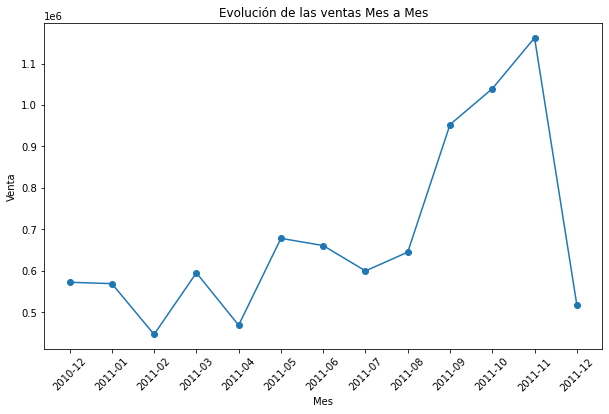

In [5]:
# Evolución de las ventas mes a mes
monthly_sales = pd.read_csv(DIRECTORY + "data/interim/monetary_value_month.csv")
monthly_sales["Prop_sales"] = (100*monthly_sales["Monetary"]/(monthly_sales["Monetary"].sum())).round(2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_sales["Month"], monthly_sales["Monetary"], marker = 'o')
ax.set(title = "Evolución de las ventas Mes a Mes",
       xlabel = "Mes",
       ylabel = "Venta")
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.show()

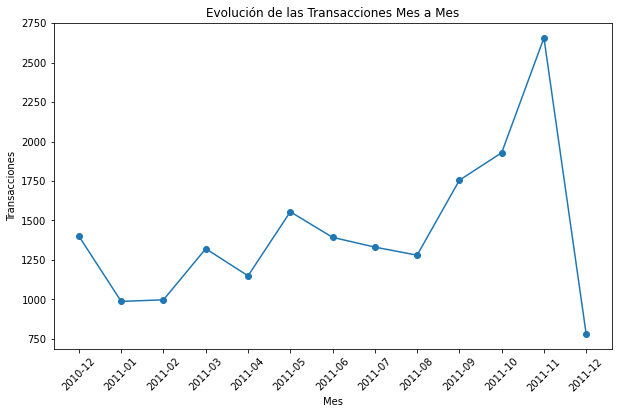

In [6]:
# Evolución de las Transacciones mes a mes
monthly_transa = pd.read_csv(DIRECTORY + "data/interim/transactions_month.csv")
monthly_transa["Prop_transa"] = (100*monthly_transa["Transactions"]/(monthly_transa["Transactions"].sum())).round(2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_transa["Month"], monthly_transa["Transactions"], marker = 'o')
ax.set(title = "Evolución de las Transacciones Mes a Mes",
       xlabel = "Mes",
       ylabel = "Transacciones")
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.show()

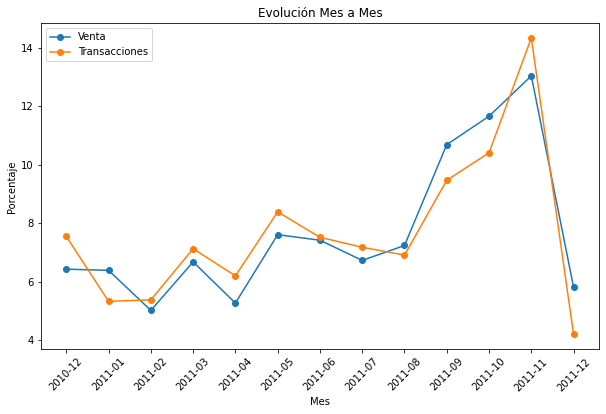

In [7]:
# Un solo gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(monthly_sales["Month"], monthly_sales["Prop_sales"], marker = 'o', label = "Venta")
ax.plot(monthly_transa["Month"], monthly_transa["Prop_transa"], marker = 'o', label = "Transacciones")
ax.set(title = "Evolución Mes a Mes",
       xlabel = "Mes",
       ylabel = "Porcentaje")
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.legend()
plt.savefig(DIRECTORY + "reports/figures/mes_mes.png")
plt.show()

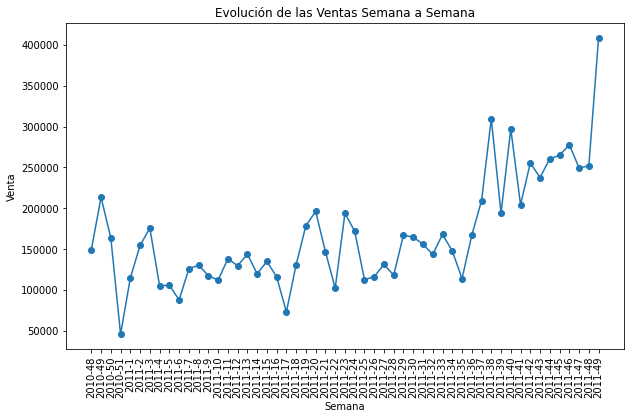

In [8]:
# Evolución de las ventas Semana a Semana
weekly_sales = pd.read_csv(DIRECTORY + "data/interim/monetary_value_week.csv")
weekly_sales["Prop_sales"] = (100*weekly_sales["Monetary"]/(weekly_sales["Monetary"].sum())).round(2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekly_sales["YearWeek"], weekly_sales["Monetary"], marker = 'o')
ax.set(title = "Evolución de las Ventas Semana a Semana",
       xlabel = "Semana",
       ylabel = "Venta")
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.show()

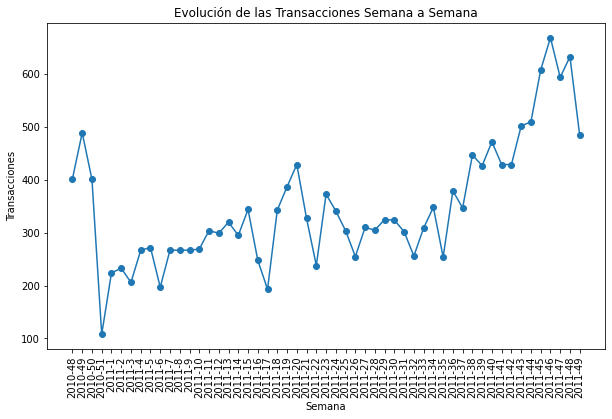

In [9]:
# Evolución de las Transacciones Semana a Semana
weekly_transa = pd.read_csv(DIRECTORY + "data/interim/transactions_week.csv")
weekly_transa["Prop_transa"] = (100*weekly_transa["Transactions"]/(weekly_transa["Transactions"].sum())).round(2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekly_transa["YearWeek"], weekly_transa["Transactions"], marker = 'o')
ax.set(title = "Evolución de las Transacciones Semana a Semana",
       xlabel = "Semana",
       ylabel = "Transacciones")
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.show()

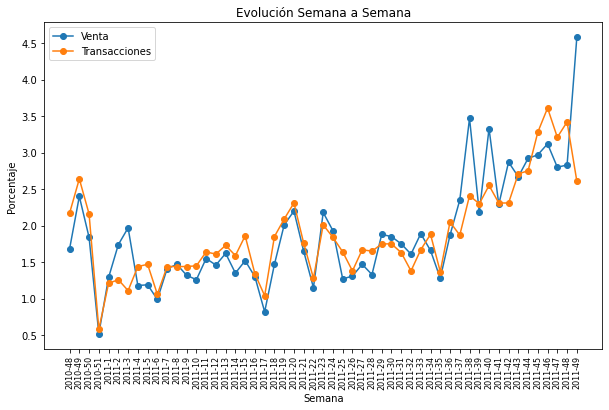

In [10]:
# Un solo gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekly_sales["YearWeek"], weekly_sales["Prop_sales"], marker = 'o', label = "Venta")
ax.plot(weekly_transa["YearWeek"], weekly_transa["Prop_transa"], marker = 'o', label = "Transacciones")
ax.set(title = "Evolución Semana a Semana",
       xlabel = "Semana",
       ylabel = "Porcentaje")
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.legend()
plt.xticks(fontsize=8)
plt.savefig(DIRECTORY + "reports/figures/semana_semana.png")
plt.show()

In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20,2011-12
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,2011-12
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,2011-12
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,2011-12


In [12]:
user_month_pivot = df.pivot_table(index=["CustomerID"], 
                                    columns=["Month"], 
                                    values=["InvoiceNo"], 
                                    aggfunc="count", 
                                    fill_value=0)
user_month_pivot.head()

InvoiceNo                                                          \
Month        2010-12 2011-01 2011-02 2011-03 2011-04 2011-05 2011-06 2011-07   
CustomerID                                                                     
12346.0            0       1       0       0       0       0       0       0   
12347.0           31      29       0       0      24       0      18       0   
12348.0           17       6       0       0       5       0       0       0   
12349.0            0       0       0       0       0       0       0       0   
12350.0            0       0      17       0       0       0       0       0   

                                                    
Month      2011-08 2011-09 2011-10 2011-11 2011-12  
CustomerID                                          
12346.0          0       0       0       0       0  
12347.0         22       0      47       0      11  
12348.0          0       3       0       0       0  
12349.0          0       0       0      73       0  
12350.0          0       0       0       0       0

In [13]:
# Replace count of invoices with 1
user_month_pivot = user_month_pivot.applymap(lambda x: 1 if x>0 else 0)
user_month_pivot.head()

InvoiceNo                                                          \
Month        2010-12 2011-01 2011-02 2011-03 2011-04 2011-05 2011-06 2011-07   
CustomerID                                                                     
12346.0            0       1       0       0       0       0       0       0   
12347.0            1       1       0       0       1       0       1       0   
12348.0            1       1       0       0       1       0       0       0   
12349.0            0       0       0       0       0       0       0       0   
12350.0            0       0       1       0       0       0       0       0   

                                                    
Month      2011-08 2011-09 2011-10 2011-11 2011-12  
CustomerID                                          
12346.0          0       0       0       0       0  
12347.0          1       0       1       0       1  
12348.0          0       1       0       0       0  
12349.0          0       0       0       1       0  
12350.0          0       0       0       0       0

In [14]:
len((user_month_pivot).columns)

13

In [15]:
def user_status(data):
    status = []
    for i in range(13):
    # Si el usuario no compra en el mes actual
        if data[i] == 0:
            # Si el usuario ha realizado compras antes.
            if len(status) > 0:
                # Si el usuario no está registrado en el mes anterior
                if status[i-1] == "No Registrado":
                # El usuario tampoco está registrado este mes.
                    status.append("No Registrado")
                # De lo contrario, el usuario es un usuario activo, es decir, ya está registrado
                else:
                    status.append("Inactivo")
            # En caso contrario el usuario no está registrado en el mes en curso, es decir, nunca ha realizado ninguna compra
            else:
                status.append("No Registrado")
        else:
            # Esta es la primera compra del usuario.
            if len(status) == 0:
                status.append("Primera Compra")
            else:
                if status[i-1] == "Inactivo":
                    status.append("Regresó")
                elif status[i-1] == "No Registrado":
                    status.append("Primera Compra")
                else:
                    status.append("Activo")
    return status

In [17]:
user_month_status = pd.DataFrame(user_month_pivot.apply(lambda x: pd.Series(user_status(x)), axis=1))
user_month_status.columns = user_month_pivot.columns
user_month_status.head()

InvoiceNo                                                 \
Month              2010-12         2011-01         2011-02        2011-03   
CustomerID                                                                  
12346.0      No Registrado  Primera Compra        Inactivo       Inactivo   
12347.0     Primera Compra          Activo        Inactivo       Inactivo   
12348.0     Primera Compra          Activo        Inactivo       Inactivo   
12349.0      No Registrado   No Registrado   No Registrado  No Registrado   
12350.0      No Registrado   No Registrado  Primera Compra       Inactivo   

                                                                        \
Month             2011-04        2011-05        2011-06        2011-07   
CustomerID                                                               
12346.0          Inactivo       Inactivo       Inactivo       Inactivo   
12347.0           Regresó       Inactivo        Regresó       Inactivo   
12348.0           Regresó       Inactivo       Inactivo       Inactivo   
12349.0     No Registrado  No Registrado  No Registrado  No Registrado   
12350.0          Inactivo       Inactivo       Inactivo       Inactivo   

                                                                         \
Month             2011-08        2011-09        2011-10         2011-11   
CustomerID                                                                
12346.0          Inactivo       Inactivo       Inactivo        Inactivo   
12347.0           Regresó       Inactivo        Regresó        Inactivo   
12348.0          Inactivo        Regresó       Inactivo        Inactivo   
12349.0     No Registrado  No Registrado  No Registrado  Primera Compra   
12350.0          Inactivo       Inactivo       Inactivo        Inactivo   

                      
Month        2011-12  
CustomerID            
12346.0     Inactivo  
12347.0      Regresó  
12348.0     Inactivo  
12349.0     Inactivo  
12350.0     Inactivo

In [18]:
month_status_pivot = pd.DataFrame(user_month_status.replace("No Registrado", np.NaN).apply(lambda x: pd.value_counts(x)))
month_status_pivot.head()

InvoiceNo                                                  \
Month            2010-12 2011-01 2011-02 2011-03 2011-04 2011-05 2011-06   
Activo               NaN   324.0     262     290     304     368     410   
Inactivo             NaN   561.0     924    1160    1578    1662    1969   
Primera Compra     885.0   417.0     380     452     300     284     242   
Regresó              NaN     NaN     116     232     252     404     339   

                                                                
Month          2011-07 2011-08 2011-09 2011-10 2011-11 2011-12  
Activo             365     388     425     489     622     371  
Inactivo          2199    2382    2350    2610    2633    3723  
Primera Compra     188     169     299     358     323      41  
Regresó            396     378     542     517     719     203

In [19]:
month_status_pivot = month_status_pivot.fillna(0).T
month_status_pivot.reset_index(inplace=True)
month_status_pivot.set_index("Month", inplace=True)

In [20]:
month_status_pivot

,level_0,Activo,Inactivo,Primera Compra,Regresó
Month,,,,,
2010-12,InvoiceNo,0.0,0.0,885.0,0.0
2011-01,InvoiceNo,324.0,561.0,417.0,0.0
2011-02,InvoiceNo,262.0,924.0,380.0,116.0
2011-03,InvoiceNo,290.0,1160.0,452.0,232.0
2011-04,InvoiceNo,304.0,1578.0,300.0,252.0
2011-05,InvoiceNo,368.0,1662.0,284.0,404.0
2011-06,InvoiceNo,410.0,1969.0,242.0,339.0
2011-07,InvoiceNo,365.0,2199.0,188.0,396.0
2011-08,InvoiceNo,388.0,2382.0,169.0,378.0


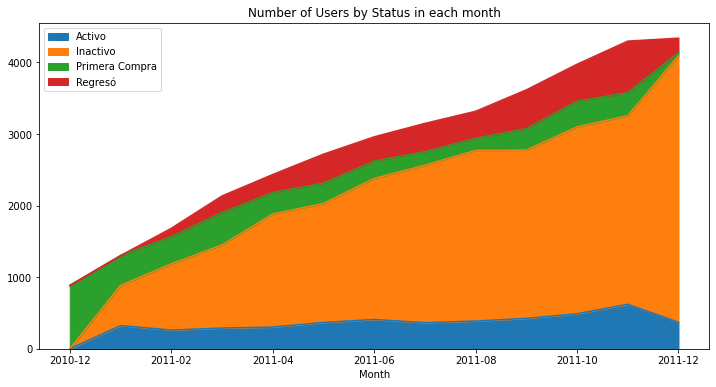

In [21]:
ax = month_status_pivot.plot.area(figsize = (12,6))
plt.title("Number of Users by Status in each month")
plt.savefig(DIRECTORY + "reports/figures/status.png")
plt.show()

### ¿Quién es el cliente de la tienda web?

In [22]:
max_date = df["InvoiceDate"].max()
min_date = df["InvoiceDate"].min()
print(f"Se cuanta con información de {min_date} hasta {max_date}")

Se cuanta con información de 2010-12-01 00:00:00 hasta 2011-12-09 00:00:00


In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderValue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
397879,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20,2011-12
397880,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,2011-12
397881,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,2011-12
397882,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,2011-12


In [24]:
transactions = df.groupby(["CustomerID"])["InvoiceNo"].nunique().mean()
print(f"Un cliente promedio hace {round(transactions)} transacciones en un año.")

Un cliente promedio hace 4 transacciones en un año.


In [25]:
MonetaryValue = (df.groupby(["CustomerID"])["OrderValue"].sum()).sum()
avg_ticket = (MonetaryValue/df.groupby(["CustomerID"])["InvoiceNo"].nunique().sum())
print(f"El ticket promedio de un cliente es de {round(avg_ticket, 2)} USD.")

El ticket promedio de un cliente es de 480.87 USD.


In [26]:
avg_mv = (df.groupby(["CustomerID"])["OrderValue"].sum()).mean()
print(f"El valor monetario promedio de un cliente de la tienda en todo el año es de {round(avg_mv, 2)} USD.")

El valor monetario promedio de un cliente de la tienda en todo el año es de 2054.27 USD.


In [27]:
# Se crea la varible recompra
df_re = df[["CustomerID", "InvoiceDate"]].drop_duplicates()
df_re.sort_values(by=["CustomerID", "InvoiceDate"], ascending=True, inplace=True)
df_re["Index"] = df_re.groupby(["CustomerID"])["InvoiceDate"].rank()
df_re["PreviousPurchaseDay"] = df_re.groupby(["CustomerID"])["InvoiceDate"].shift(1)
df_re = df_re[df_re["Index"] > 1]
df_re["Repurchase"] = (df_re["InvoiceDate"]-df_re["PreviousPurchaseDay"])/np.timedelta64(1, 'D')
df_re.reset_index(inplace=True, drop=True)
median_repurchase =  df_re.groupby(["CustomerID"], as_index=False)["Repurchase"].median()
avg_repurchase = median_repurchase["Repurchase"].mean()
print(f"Un cliente promedio visita la tienda web cada {round(avg_repurchase)} días.")

Un cliente promedio visita la tienda web cada 75 días.


In [28]:
DifProducts = df.groupby(["CustomerID"])["StockCode"].nunique()
transactions = df.groupby(["CustomerID"])["InvoiceNo"].nunique()
dif_produc = (DifProducts/transactions).mean()
print(f"En cada transacción un cliente promedio lleva {round(dif_produc)} productos diferentes.")

En cada transacción un cliente promedio lleva 19 productos diferentes.


In [29]:
units = df.groupby(["CustomerID"])["Quantity"].sum()
transactions = df.groupby(["CustomerID"])["InvoiceNo"].nunique()
Quantity = (units/transactions).mean()
print(f"En cada transacción un cliente promedio lleva {round(Quantity)} unidades.")

En cada transacción un cliente promedio lleva 253 unidades.


In [30]:
fequency = df.groupby(["CustomerID"])["InvoiceDate"].nunique().mean()
print(f"Un cliente promedio vista la tienda web {round(fequency)} veces en el año.")

Un cliente promedio vista la tienda web 4 veces en el año.


In [31]:
max_date = df["InvoiceDate"].max()
last = df.groupby(["CustomerID"])["InvoiceDate"].max()
recency = ((max_date-last)/np.timedelta64(1, 'D')).mean()
print(f"La recencia de un cliente pormedio es de {round(recency)} días.")

La recencia de un cliente pormedio es de 92 días.


In [32]:
df["OrderValue"].sum()

8911407.904